## Utility to select the first/last slice to include in vascDen.py

Goal is to set (firstSlice, lastSlice) in master_cell_db.csv

## Imports

In [1]:
import os, json
from collections import OrderedDict

import numpy as np

import matplotlib.pyplot as plt

import bimpy

## Utility

In [2]:
def perSliceStats(stackData):
    numSlices = stackData.shape[0]

    theRet = OrderedDict()
    theRet['min'] = []
    theRet['max'] = []
    theRet['range'] = []
    theRet['mean'] = []
    theRet['std'] = []
    #theRet['snr'] = []
    theRet['ten percent'] = []

    for i in range(numSlices):
        sliceData = stackData[i,:,:]
        
        theMin = np.nanmin(sliceData)
        theMax = np.nanmax(sliceData)
        theMean = np.nanmean(sliceData)
        theSTD = np.nanstd(sliceData)
        theRange = theMax - theMin + 1
        if theMin == 0:
            theSNR = np.nan
        else:
            theSNR = theMax / theMin
            
        theRet['min'].append(theMin)
        theRet['max'].append(theMax)
        theRet['range'].append(theRange)
        theRet['mean'].append(theMean)
        theRet['std'].append(theSTD)
        #theRet['snr'].append(theSNR)
 
        # count pixels in bottom 10%
        nPixels = sliceData.size
        tenPercent = theRange * 0.1
        lowerTenPercent = np.count_nonzero(sliceData<tenPercent)
        lowerTenPercent = lowerTenPercent/ nPixels * 100
        #upperTenPercent = np.count_nonzero(sliceData<tenPercent)
        theRet['ten percent'].append(lowerTenPercent)
    #
    return theRet

def _printStackParams(name, myStack):
    print('  ', name, myStack.shape, myStack.dtype, 'dtype.char:', myStack.dtype.char,
            'min:', np.min(myStack),
            'max:', np.max(myStack),
            'mean:', round(np.mean(myStack), 3),
            'std:', round(np.std(myStack), 3),
            )


## Load

In [4]:
rawPath = '/Users/cudmore/box/data/nathan/20200116/analysis2/20190116__A01_G001_0007_ch1_raw.tif'
rawPath = '/Users/cudmore/box/data/nathan/20200116/analysis2/20190116__A01_G001_0010_ch1_raw.tif'
rawPath = '/Users/cudmore/box/data/nathan/20200116/analysis2/20190116__A01_G001_0011_ch1_raw.tif'

rawPath = '/Users/cudmore/box/data/nathan/20200116/20190116__A01_G001_0014_ch1.tif' #done
rawPath = '/Users/cudmore/box/data/nathan/20200116/20190116__A01_G001_0015_ch1.tif'
#rawPath = '/Users/cudmore/box/data/nathan/20200116/20190116__A01_G001_0018_ch1.tif'
#rawPath = '/Users/cudmore/box/data/nathan/20200116/20190116__A01_G001_0019_ch1.tif'
#rawPath = '/Users/cudmore/box/data/nathan/20200116/20190116__A01_G001_0022_ch1.tif'
#rawPath = '/Users/cudmore/box/data/nathan/20200116/20190116__A01_G001_0023_ch1.tif'
#rawPath = '/Users/cudmore/box/data/nathan/20200116/20190116__A01_G001_0027_ch1.tif'
rawPath = '/Users/cudmore/box/data/nathan/20200116/20190116__A01_G001_0028_ch1.tif'

rawPath = '/Users/cudmore/box/data/nathan/20200518/20200518__A01_G001_0010_ch2.tif'

stackData, tiffHeader = bimpy.util.bTiffFile.imread(rawPath)
_printStackParams('stackData', stackData)

# zVoxel = tiffHeader['zVoxel']

print('loaded:', rawPath)



   stackData (64, 512, 512) uint8 dtype.char: B min: 0 max: 255 mean: 32.003 std: 52.556
loaded: /Users/cudmore/box/data/nathan/20200518/20200518__A01_G001_0010_ch2.tif


## Extract per slice min/max/mean/snr, etc...

In [5]:
# perSliceStats is defined above
stackStatDict = perSliceStats(stackData)

## Plot

This is not informative? What was I thinking this could be?

In [6]:
# to set y tick density (we want more)
import matplotlib.ticker as plticker

rawPath: /Users/cudmore/box/data/nathan/20200518/20200518__A01_G001_0010_ch2.tif
zVoxel: 1
numSlices: 64


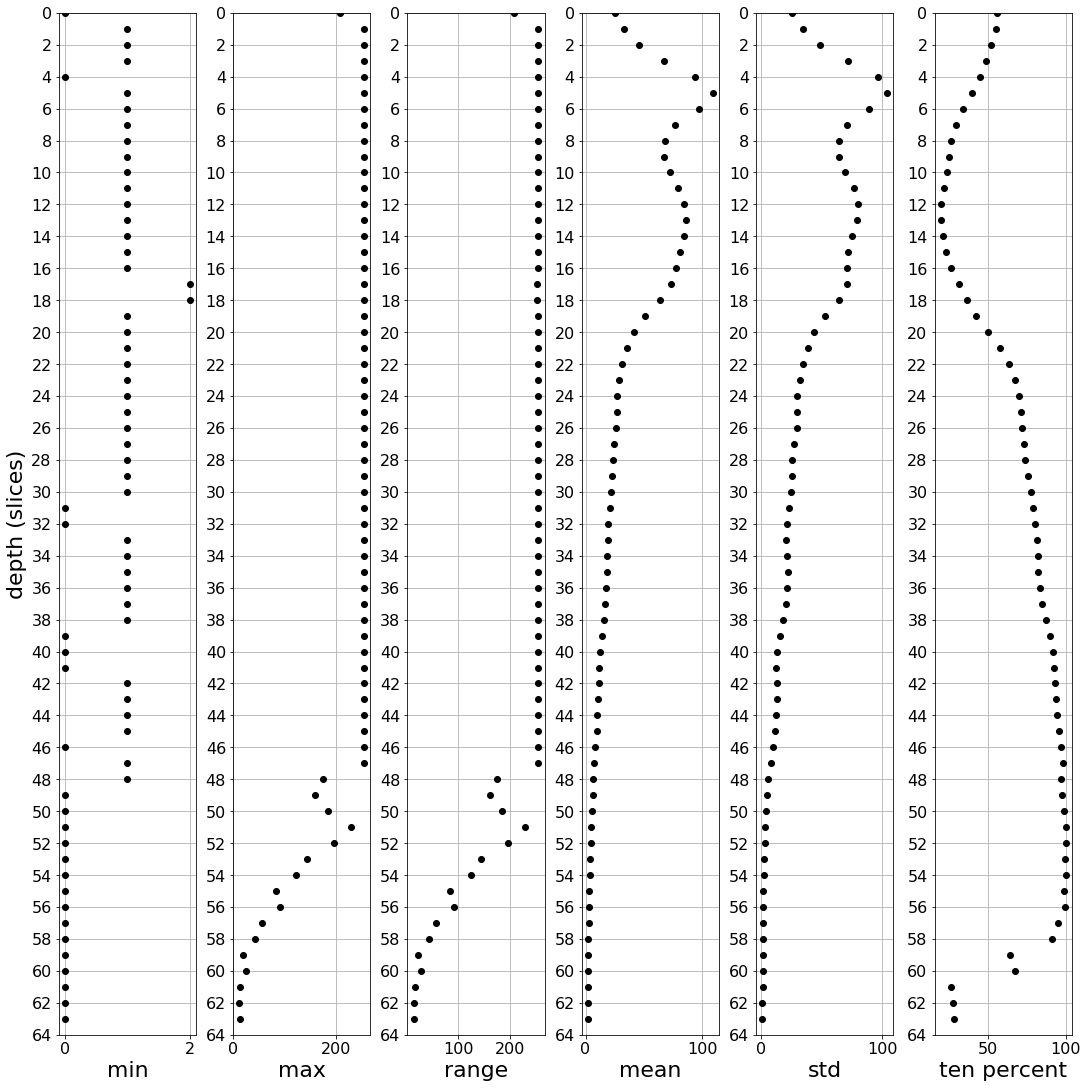

In [7]:
print('rawPath:', rawPath)

numStats = len(stackStatDict.items())

fig, axs = plt.subplots(1, numStats, sharey=False, figsize=(15,15), constrained_layout=True)
axs = np.ravel(axs)

myFontSizeSmaller = 16
myFontSize = 22

#zVoxel = tiffHeader['zVoxel']
zVoxel = 1
print('zVoxel:', zVoxel)

numSlices = stackData.shape[0]
print('numSlices:', numSlices)
ySlices = [z*zVoxel for z in range(numSlices)]

maxDepth = numSlices * zVoxel

for idx, (stat, v) in enumerate(stackStatDict.items()):
    ax = axs[idx]
    
    ax.plot(v, ySlices, 'ok')
    
    ax.set_xlabel(stat, fontsize=myFontSize)
    if idx == 0:
        ax.set_ylabel('depth (slices)', fontsize=myFontSize)

    ax.set_ylim(maxDepth, 0) # reversed

    ax.tick_params(axis='x', labelsize=myFontSizeSmaller)
    ax.tick_params(axis='y', labelsize=myFontSizeSmaller)

    # set yaxis tick density (we want more)
    loc = plticker.MultipleLocator(base=2.0) # this locator puts ticks at regular intervals
    ax.yaxis.set_major_locator(loc)
    
    # turn on grid
    ax.grid()